In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv('concrete.csv')

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
df.shape

(1030, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [7]:
df.isnull().any()

cement          False
slag            False
ash             False
water           False
superplastic    False
coarseagg       False
fineagg         False
age             False
strength        False
dtype: bool

In [8]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt 

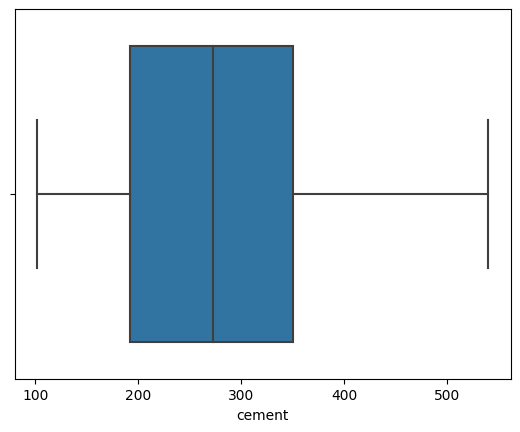

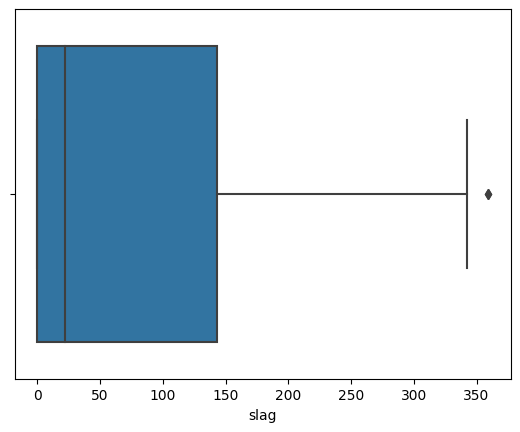

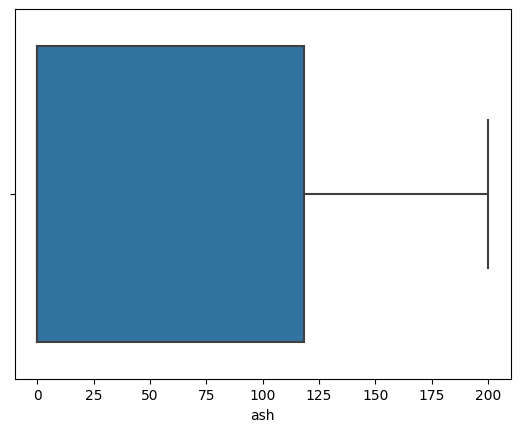

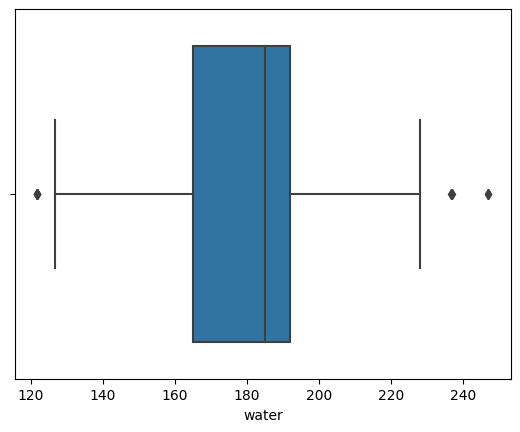

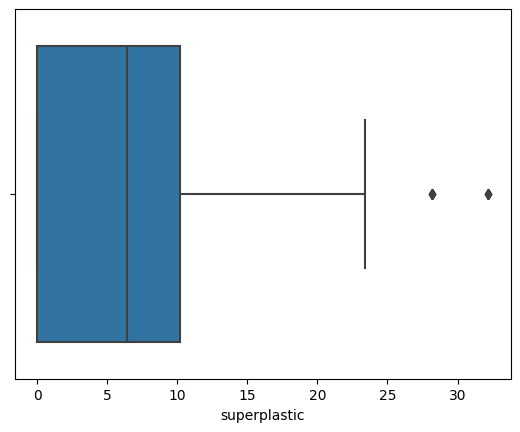

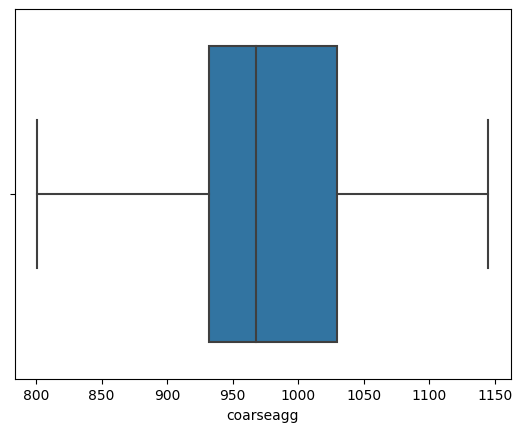

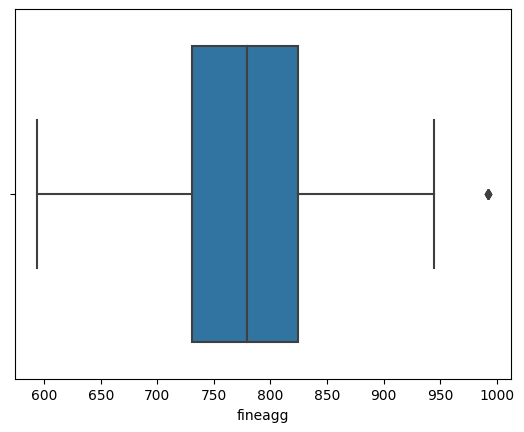

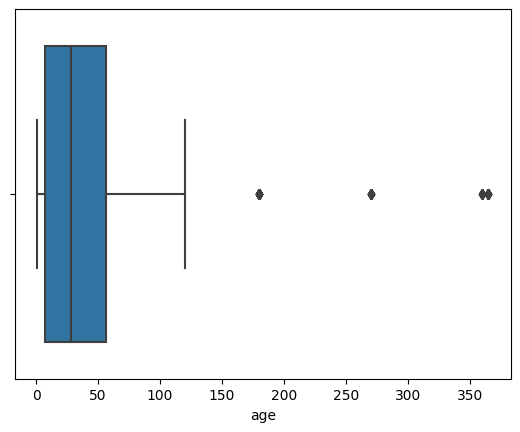

In [10]:
for i in df.columns[:8] :
    sns.boxplot(x=i , data = df ) 
    plt.show()

In [11]:
for i in df.columns[:8] :
    q1 = np.percentile(df[i], 25)
    q3 = np.percentile(df[i], 75) 
    iqr = q3 - q1 
    la = q1 - 1.5*iqr
    ra = q3 + 1.5*iqr
    df[i] = np.where(df[i] < la , la , np.where(df[i] > ra , ra , df[i] ))

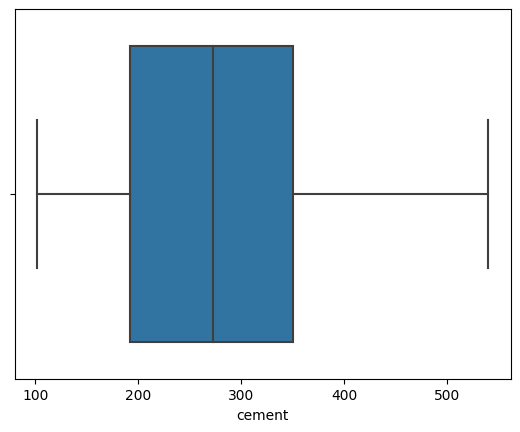

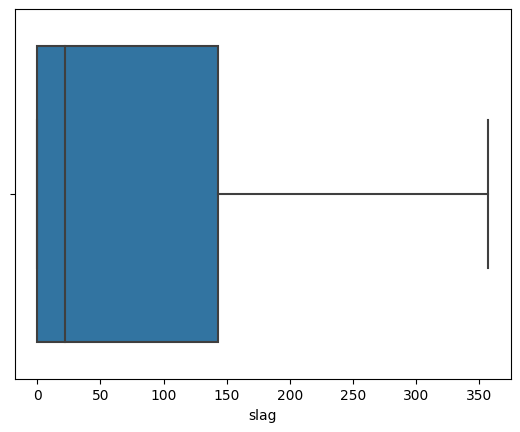

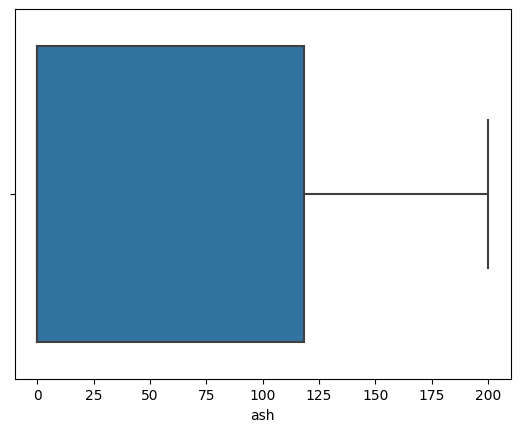

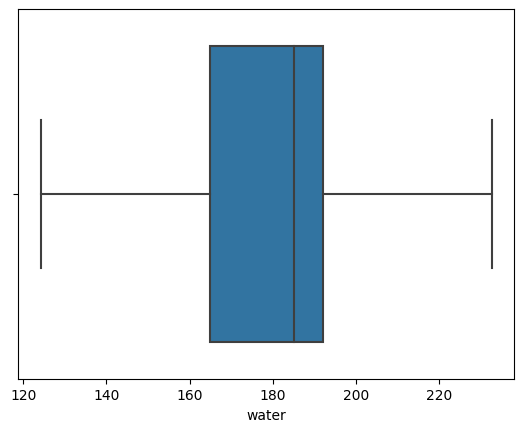

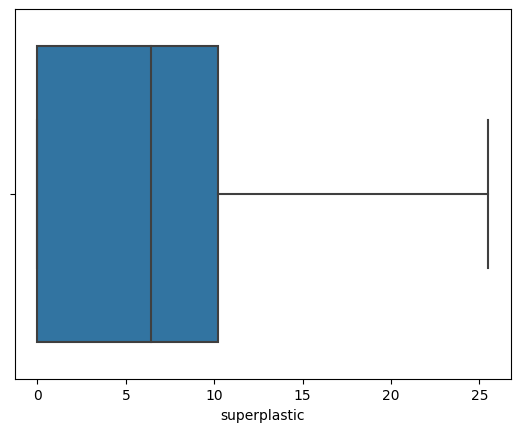

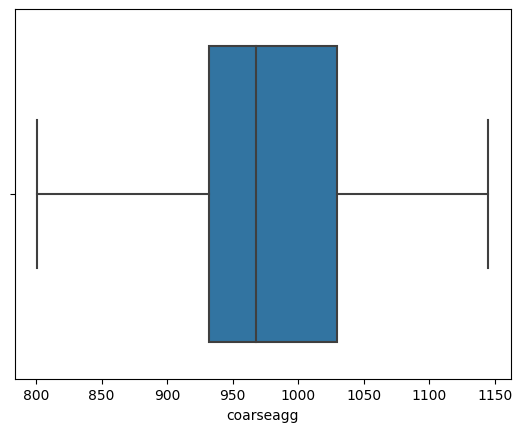

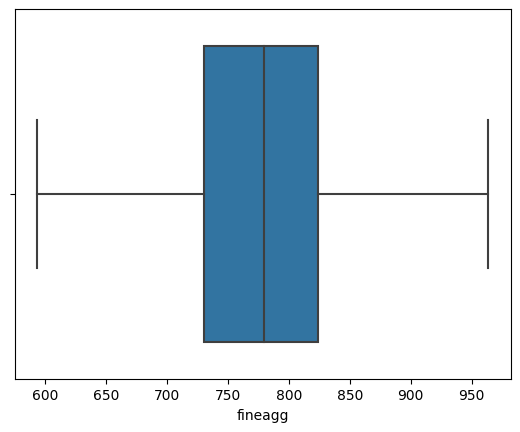

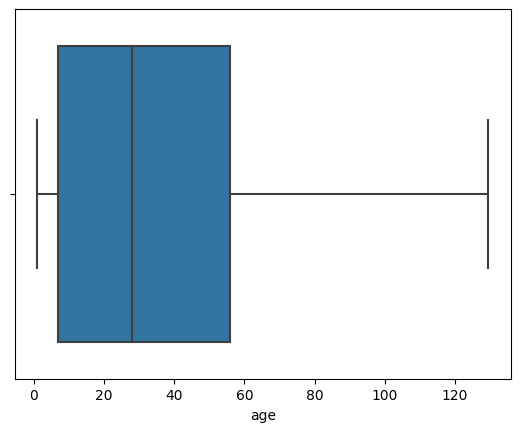

In [12]:
for i in df.columns[:8] :
    sns.boxplot(x=i , data = df ) 
    plt.show()

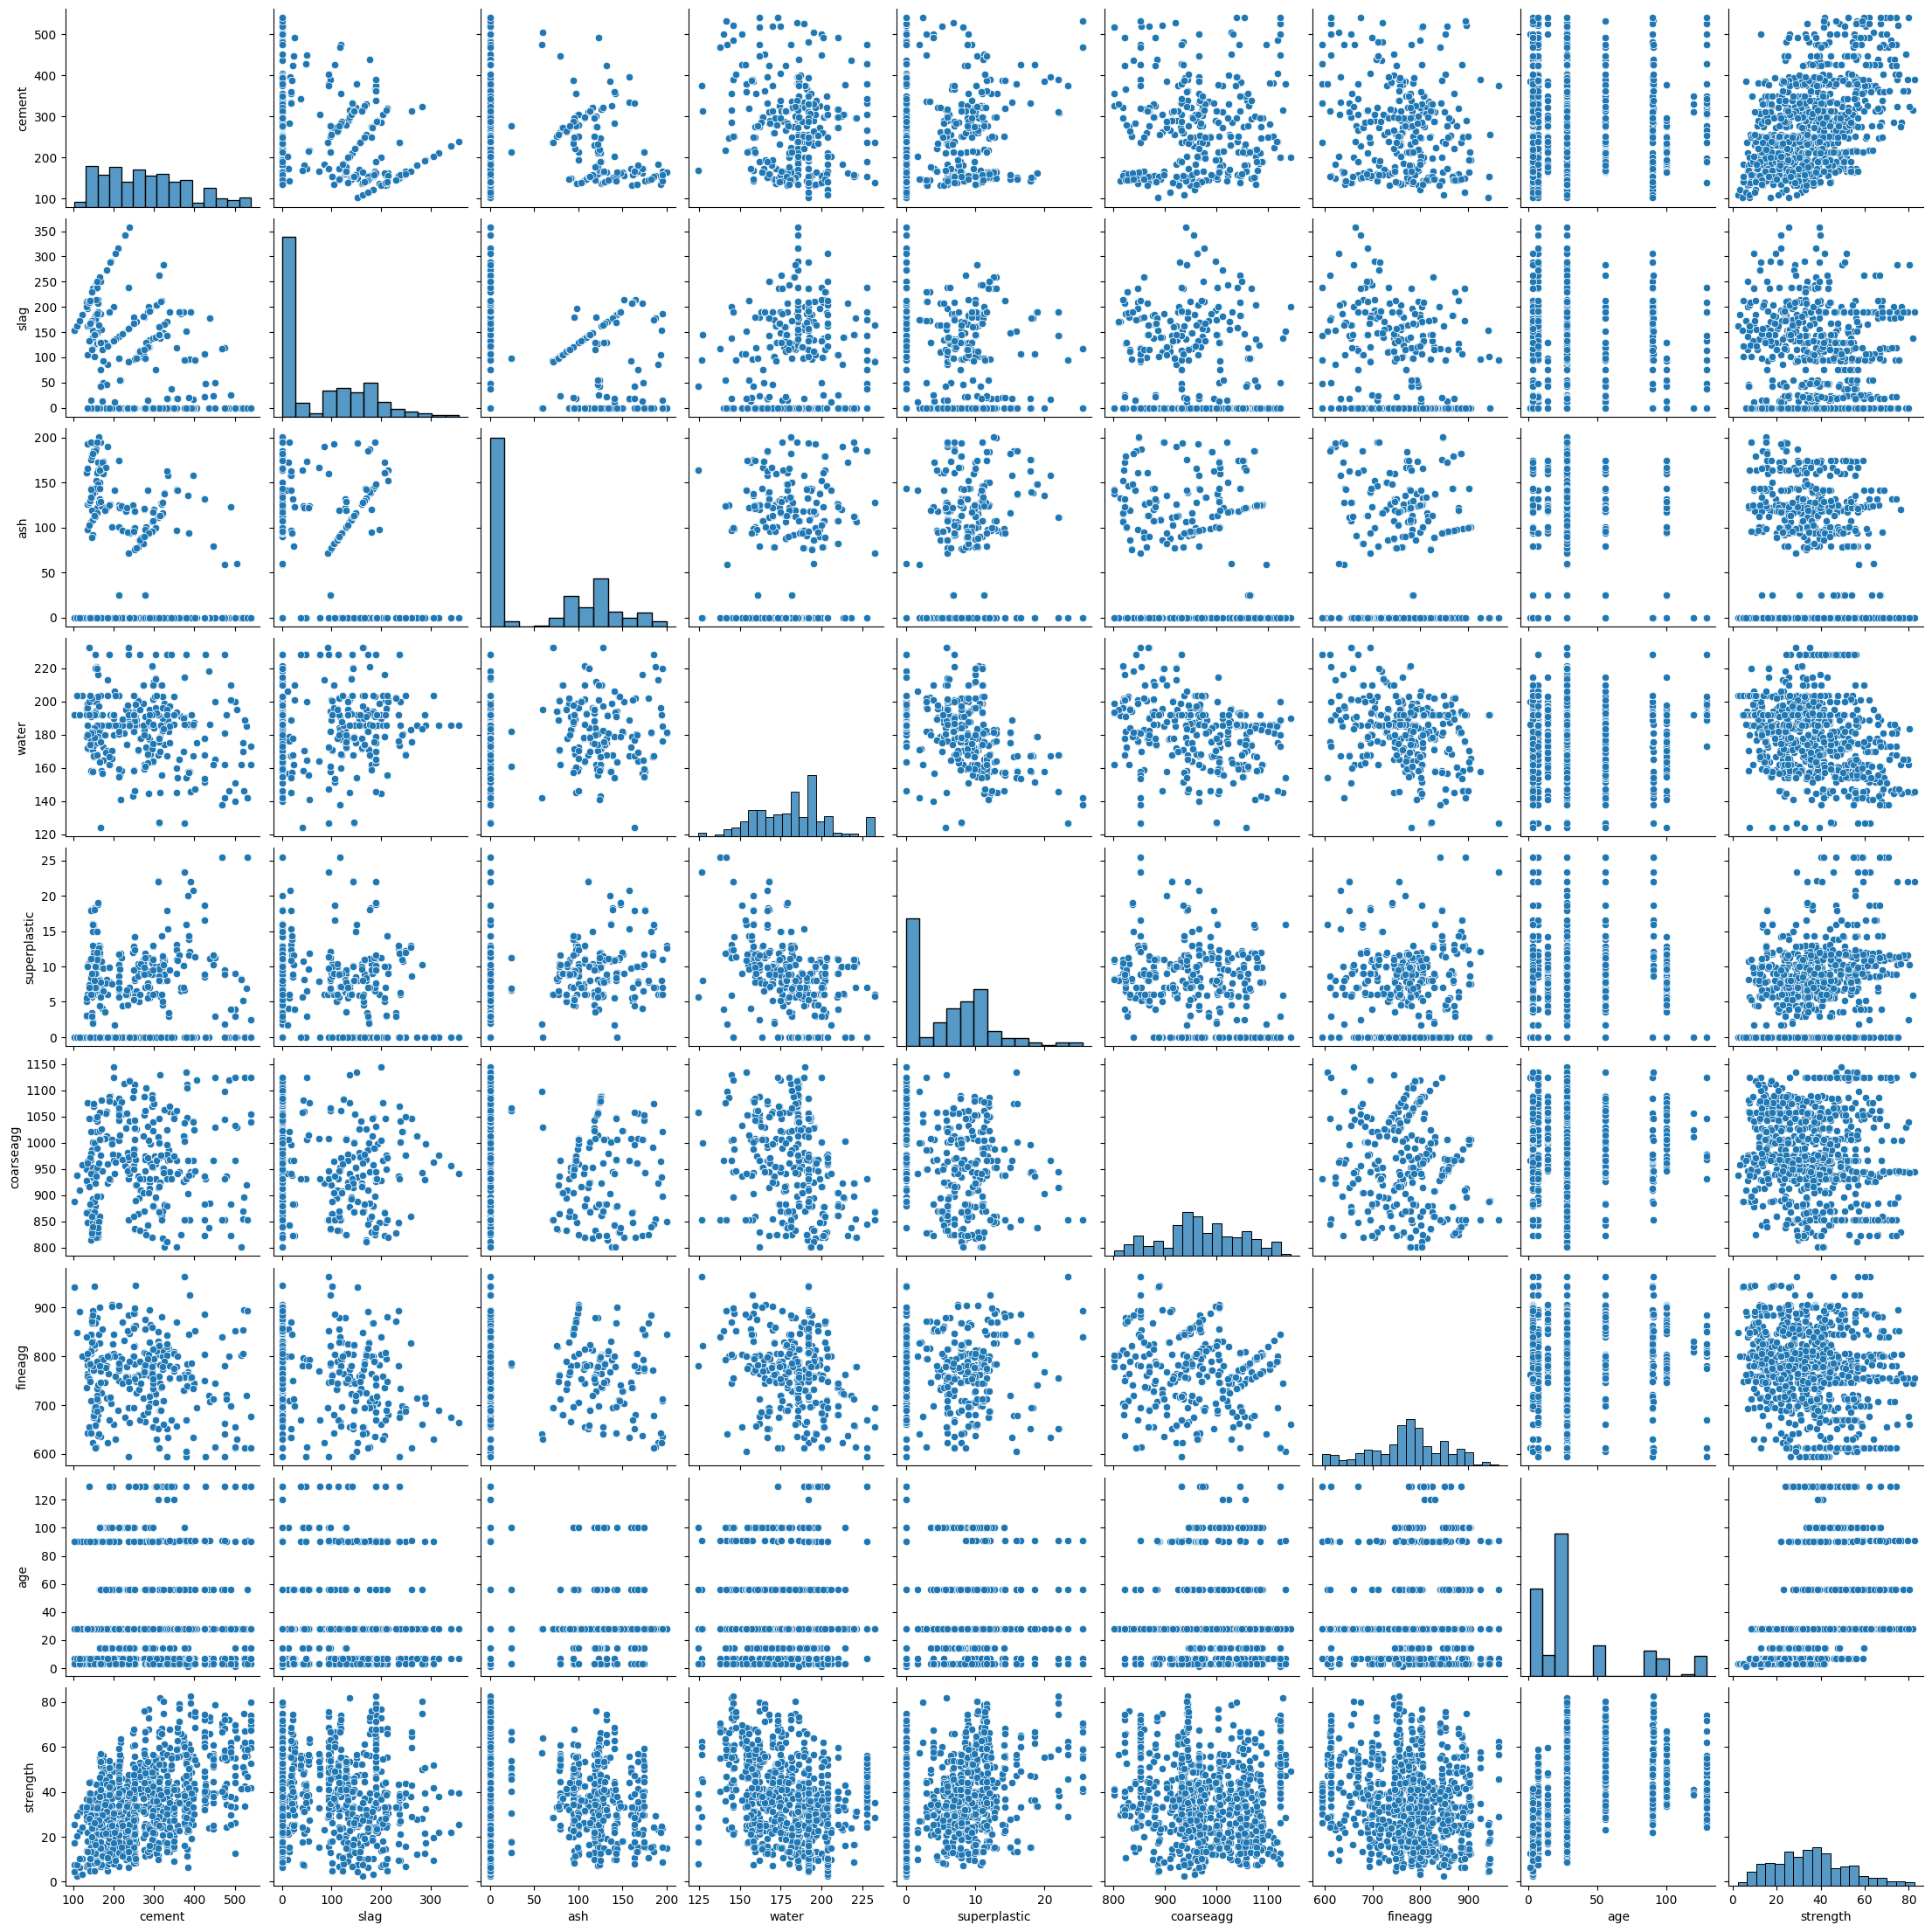

In [13]:
sns.pairplot(df)

In [14]:
df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275239,-0.397467,-0.081617,0.079619,-0.109349,-0.225311,0.054325,0.497832
slag,-0.275239,1.000000,-0.323590,0.107031,0.043724,-0.284023,-0.283263,-0.052703,0.134859
ash,-0.397467,-0.323590,1.000000,-0.258379,0.395319,-0.009961,0.080962,-0.092704,-0.105755
water,-0.081617,0.107031,-0.258379,1.000000,-0.665260,-0.180249,-0.448979,0.189637,-0.291203
superplastic,0.079619,0.043724,0.395319,-0.665260,1.000000,-0.261624,0.216947,-0.122913,0.366375
coarseagg,-0.109349,-0.284023,-0.009961,-0.180249,-0.261624,1.000000,-0.176542,0.012295,-0.164935
fineagg,-0.225311,-0.283263,0.080962,-0.448979,0.216947,-0.176542,1.000000,-0.096565,-0.169584
age,0.054325,-0.052703,-0.092704,0.189637,-0.122913,0.012295,-0.096565,1.000000,0.469625
strength,0.497832,0.134859,-0.105755,-0.291203,0.366375,-0.164935,-0.169584,0.469625,1.000000


In [15]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error

In [16]:
x = df.drop(columns='strength')
y = df['strength']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=42)

In [18]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X_train.columns)
    ])

In [19]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [20]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf_regressor)
])

In [21]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [22]:
y_pred = pipeline.predict(X_test)

In [23]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 25.3052186288856


In [24]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

R2 Score: 0.9115630281259253


In [27]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, x, y, cv=5, scoring='r2')
print('Average R2 Score:', scores.mean())

Average R2 Score: 0.9084442525840133
